In [2]:
#importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Uploading the file to Colab
from google.colab import files
uploaded = files.upload()

#Load the dataset
file_path = "Smart Phone Sales Data.xlsx"
df = pd.read_excel(file_path)



Saving Smart Phone Sales Data.xlsx to Smart Phone Sales Data.xlsx


In [4]:
# Convert numeric columns and handle missing values
df['Selling Price'] = pd.to_numeric(df['Selling Price'], errors='coerce')
df['Discount'] = pd.to_numeric(df['Discount'], errors='coerce')
df['discount percentage'] = pd.to_numeric(df['discount percentage'], errors='coerce')
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')  # Ensure Rating is numeric
df = df.dropna()  # Drop rows with missing values for simplicity

# Function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for relevant numeric columns
numeric_columns = ['Selling Price', 'Discount', 'discount percentage', 'Rating']
for col in numeric_columns:
    df = remove_outliers(df, col)



<ipython-input-5-6357cf79fe37>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=brand_sales, x='Brands', y='total_sales', palette='viridis')


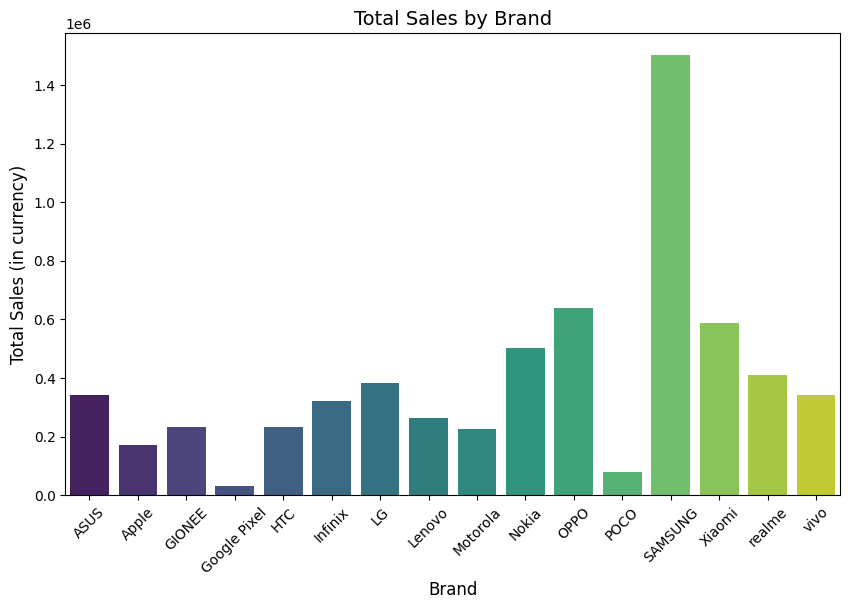

In [5]:
# 1. Sales Trends by Brand
brand_sales = df.groupby('Brands').agg(
    total_sales=('Selling Price', 'sum'),
    avg_price=('Selling Price', 'mean')
).reset_index()

# Visualization: Total Sales by Brand
plt.figure(figsize=(10, 6))
sns.barplot(data=brand_sales, x='Brands', y='total_sales', palette='viridis')
plt.title('Total Sales by Brand', fontsize=14)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Total Sales (in currency)', fontsize=12)
plt.xticks(rotation=45)
plt.show()


<ipython-input-8-0ce771c5e954>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_models, x='Models', y='total_sales', palette='magma')


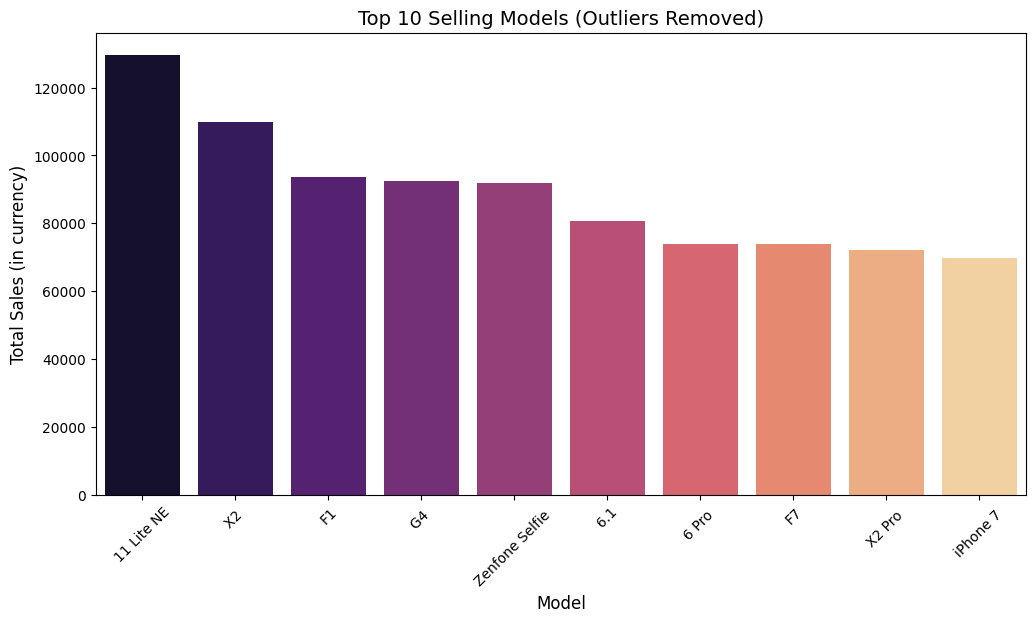

In [8]:
# 2. Sales Trends by Model
model_sales = df.groupby('Models').agg(
    total_sales=('Selling Price', 'sum')
).reset_index().sort_values(by='total_sales', ascending=False)

# Visualization: Top 10 Selling Models
top_models = model_sales.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_models, x='Models', y='total_sales', palette='magma')
plt.title('Top 10 Selling Models (Outliers Removed)', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Total Sales (in currency)', fontsize=12)
plt.xticks(rotation=45)
plt.show()



Discount Analysis DataFrame:
     Brands  avg_discount
13   Xiaomi      0.032285
2    GIONEE      0.024460
15     vivo      0.022761
5   Infinix      0.022086
9     Nokia      0.010321
12  SAMSUNG      0.000075


<ipython-input-14-d0ff333475f1>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=discount_analysis, x='Brands', y='avg_discount', palette='coolwarm')


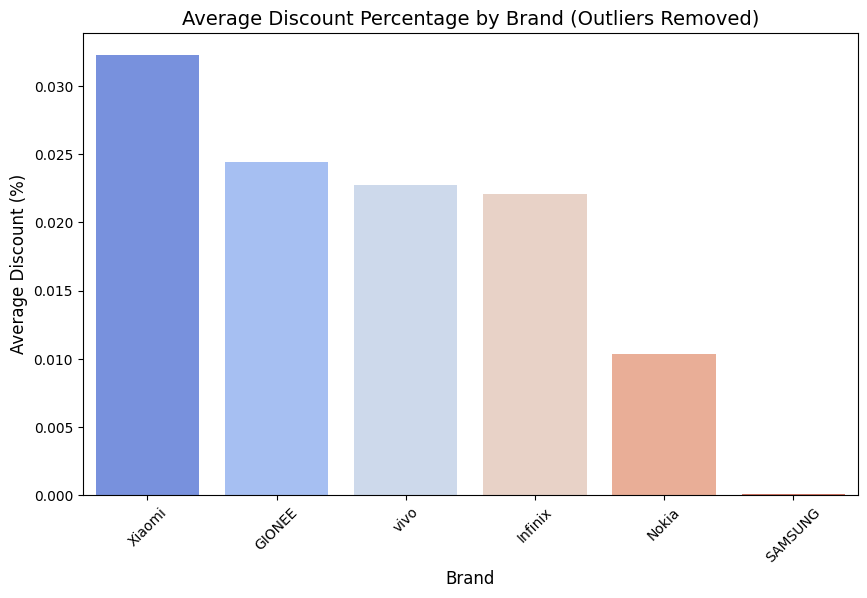

In [14]:
# 3. Discount Patterns
# Check for missing or zero data before proceeding
if df.empty or 'discount percentage' not in df.columns:
    print("Error: DataFrame is empty or column 'discount percentage' is missing.")
else:
    # Group and calculate the average discount percentage by brand
    discount_analysis = df.groupby('Brands').agg(
        avg_discount=('discount percentage', 'mean')
    ).reset_index()

    # Sort by average discount in descending order
    discount_analysis = discount_analysis.sort_values(by='avg_discount', ascending=False)

    # Filter out rows with NaN or zero values
    discount_analysis = discount_analysis[discount_analysis['avg_discount'] > 0]

    # Check if the DataFrame is empty after processing
    if discount_analysis.empty:
        print("Error: No data available for discount analysis after cleaning.")
    else:
        # Print the DataFrame for debugging
        print("Discount Analysis DataFrame:")
        print(discount_analysis)

        # Visualization: Average Discount Percentage by Brand
        plt.figure(figsize=(10, 6))
        sns.barplot(data=discount_analysis, x='Brands', y='avg_discount', palette='coolwarm')
        plt.title('Average Discount Percentage by Brand (Outliers Removed)', fontsize=14)
        plt.xlabel('Brand', fontsize=12)
        plt.ylabel('Average Discount (%)', fontsize=12)
        plt.xticks(rotation=45)
        plt.show()




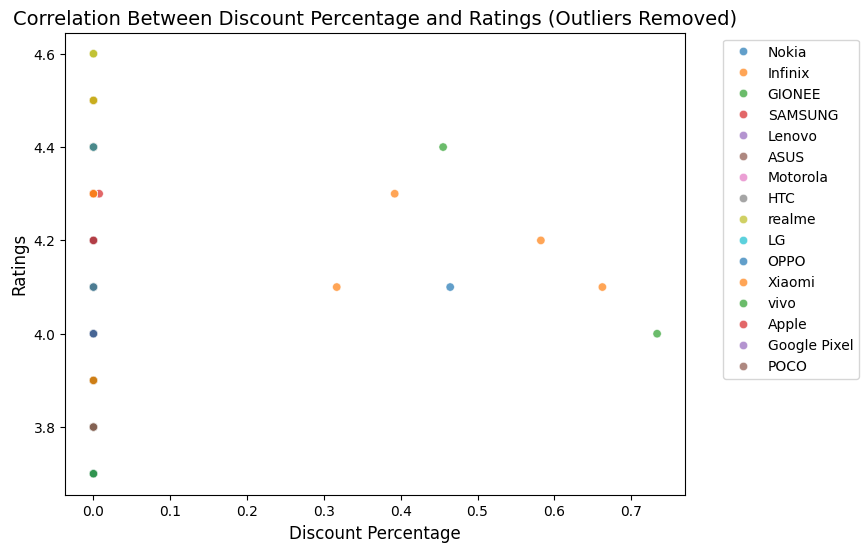

In [16]:
# 4. Correlation Between Discounts and Ratings
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='discount percentage', y='Rating', hue='Brands', palette='tab10', alpha=0.7)
plt.title('Correlation Between Discount Percentage and Ratings (Outliers Removed)', fontsize=14)
plt.xlabel('Discount Percentage', fontsize=12)
plt.ylabel('Ratings', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


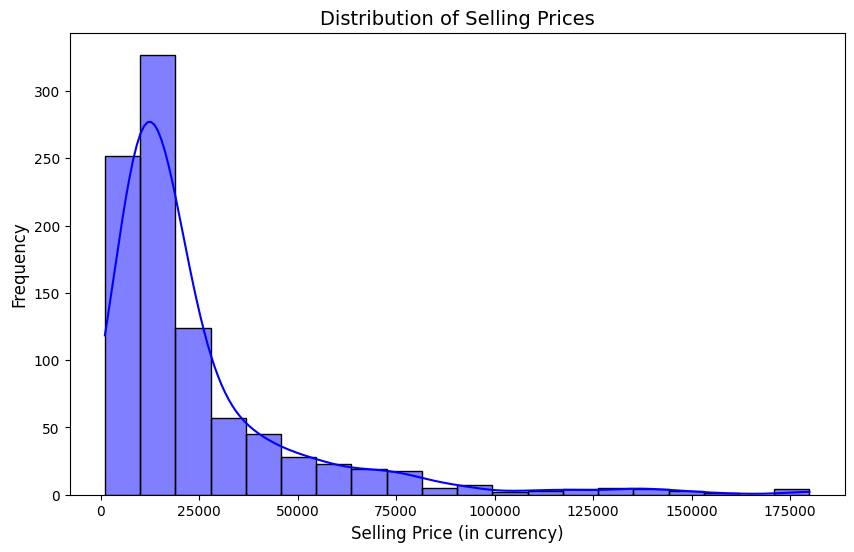

In [12]:
# 5. Distribution of Selling Prices
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Selling Price', kde=True, bins=20, color='blue')
plt.title('Distribution of Selling Prices', fontsize=14)
plt.xlabel('Selling Price (in currency)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


CONCLUSION

This project successfully analyzed smartphone sales trends, highlighting key insights such as top-performing brands, best-selling models, and the impact of discounts on sales and customer satisfaction. Mid-range price points were identified as the most popular among buyers. The findings provide valuable guidance for optimizing pricing and marketing strategies. Further analysis could explore demographic or temporal trends to enhance predictions.